In [ ]:
#Generation of X4 training dataset

from dataset import generate_training_data

generate_training_data("datasets/train/train_sharp_bicubic/X4", "datasets/resized/", scale=4)
generate_training_data("datasets/train/train_blur_bicubic/X4", "datasets/resized/", scale=4)
generate_training_data("datasets/train/train_sharp/", "datasets/sr_resized_X4/", scale=4)
generate_training_data("datasets/train/train_blur/", "datasets/sr_resized_X4/", scale=4)

In [4]:
#Generation of X2 training dataset

from dataset import generate_training_data

generate_training_data("datasets/train/train_sharp_bicubic/X4", "datasets/sr_resized_X2/", scale=2)
generate_training_data("datasets/train/train_blur_bicubic/X4", "datasets/sr_resized_X2/", scale=2)

In [ ]:
#Generation of validation datasets

from dataset import generate_validation_set

generate_validation_set("datasets/val/val_sharp_bicubic/X4", "datasets/val_resized/", "datasets/val/val_sharp/", "datasets/val_sr_resized_X4/", scale=4)
generate_training_data("datasets/val/val_sharp_bicubic/X4", "datasets/val_resized_X2/", scale=2)

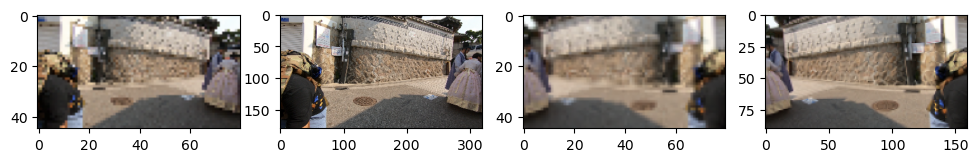

In [3]:
#Data augmentation
import numpy as np
import os
from preprocessing import augment_data
import matplotlib.pyplot as plt

for frame_X, frame_Y in zip(sorted(os.listdir("datasets/resized/")), sorted(os.listdir("datasets/sr_resized_X4/"))):
    if (frame_X == "aug_X4" or frame_X == "aug_X2"): break
    lr4, hr4 = augment_data(os.path.join("datasets/resized/", frame_X), os.path.join("datasets/sr_resized_X4/", frame_Y))

    if(not os.path.exists("datasets/resized/aug_X4/")):
        os.makedirs("datasets/resized/aug_X4/")
    if(not os.path.exists("datasets/sr_resized/aug_X4/")):
        os.makedirs("datasets/sr_resized_X4/aug_X4/")

    plt.imsave(f"datasets/resized/aug_X4/{frame_X}", lr4)
    plt.imsave(f"datasets/sr_resized_X4/aug_X4/{frame_Y}", hr4)

for frame_X, frame_Y in zip(sorted(os.listdir("datasets/resized/")), sorted(os.listdir("datasets/sr_resized_X2/"))):
    if (frame_X == "aug_X4" or frame_X == "aug_X2"): break
    lr2, hr2 = augment_data(os.path.join("datasets/resized/", frame_X), os.path.join("datasets/sr_resized_X2/", frame_Y))

    if(not os.path.exists("datasets/resized/aug_X4/")):
        os.makedirs("datasets/resized/aug_X2/")
    if(not os.path.exists("datasets/sr_resized_X2/aug_X4/")):
        os.makedirs("datasets/sr_resized_X2/aug_X2/")

    plt.imsave(f"datasets/resized/aug_X2/{frame_X}", lr2)
    plt.imsave(f"datasets/sr_resized_X2/aug_X2/{frame_Y}", hr2)


fig, axs = plt.subplots(1, 4, figsize=(12, 8))
axs[0].imshow(lr4)
axs[1].imshow(hr4)
axs[2].imshow(lr2)
axs[3].imshow(hr2)
plt.show()



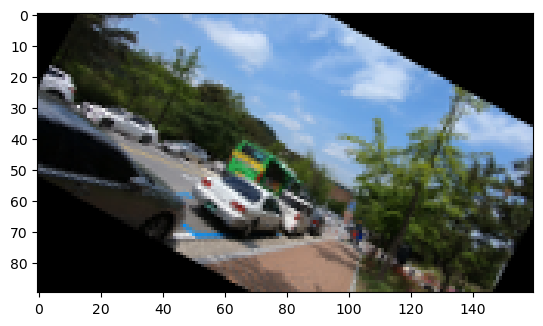

In [6]:
import cv2
import matplotlib.pyplot as plt

img = cv2.cvtColor(cv2.imread("datasets/sr_resized_X2/aug_X2/6.png"), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [1]:
#Generate h5 files
from dataset import training_data, val_data

training_data("datasets/resized/aug_X2/", "datasets/sr_resized_X2/aug_X2/", "datasets/h5/train_X2.h5")
val_data("datasets/val_resized/", "datasets/val_resized_X2/", "datasets/h5/val_X2.h5")

training_data("datasets/resized/aug_X4/", "datasets/sr_resized_X4/aug_X4/", "datasets/h5/train_X4.h5")
val_data("datasets/val_resized/", "datasets/val_sr_resized_X4/", "datasets/h5/val_X4.h5")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


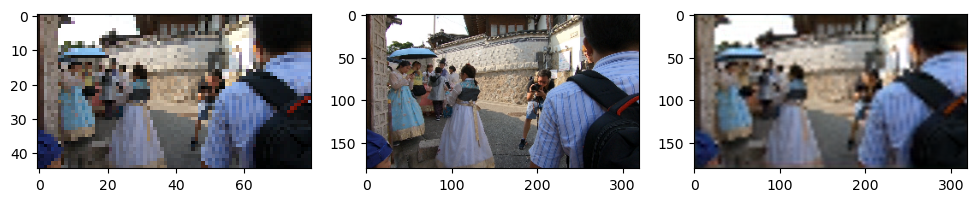

In [79]:
import numpy as np
import matplotlib.pyplot as plt

lr = np.load("plot_data/lr.npy")
hr = np.load("plot_data/hr.npy")
sr = np.load("plot_data/sr.npy")

fig, axs = plt.subplots(1, 3, figsize=(12, 8))
axs[0].imshow(lr)
axs[1].imshow(hr)
axs[2].imshow(sr)
plt.show()


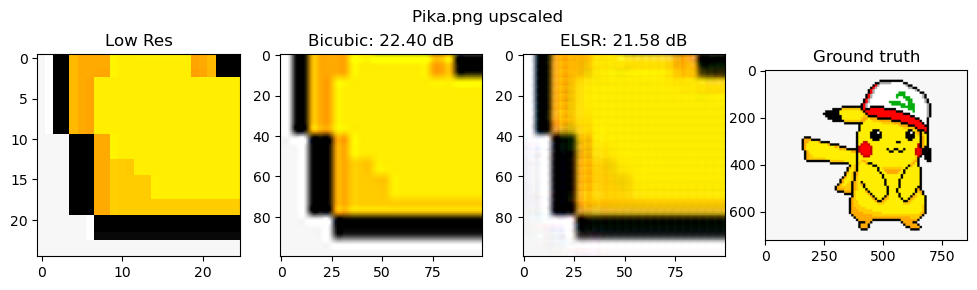

In [78]:
import matplotlib.pyplot as plt
import cv2

im = cv2.cvtColor(cv2.imread("test/pika.png"), cv2.COLOR_BGR2RGB)
lr = cv2.resize(im, (im.shape[1]//4, im.shape[0]//4), interpolation=cv2.INTER_CUBIC)
bc = cv2.cvtColor(cv2.imread("out/bicubic.png"), cv2.COLOR_BGR2RGB)
sr = cv2.cvtColor(cv2.imread("out/output.png"), cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 4, figsize=(12, 3))
fig.suptitle("Pika.png upscaled")
axs[0].set_title("Low Res")
axs[1].set_title("Bicubic: 22.40 dB")
axs[2].set_title("ELSR: 21.58 dB")
axs[3].set_title("Ground truth")
axs[0].imshow(lr[300//4:400//4, 150//4:250//4])
axs[1].imshow(bc[300:400, 150:250])
axs[2].imshow(sr[300:400, 150:250])
axs[3].imshow(im)
plt.show()

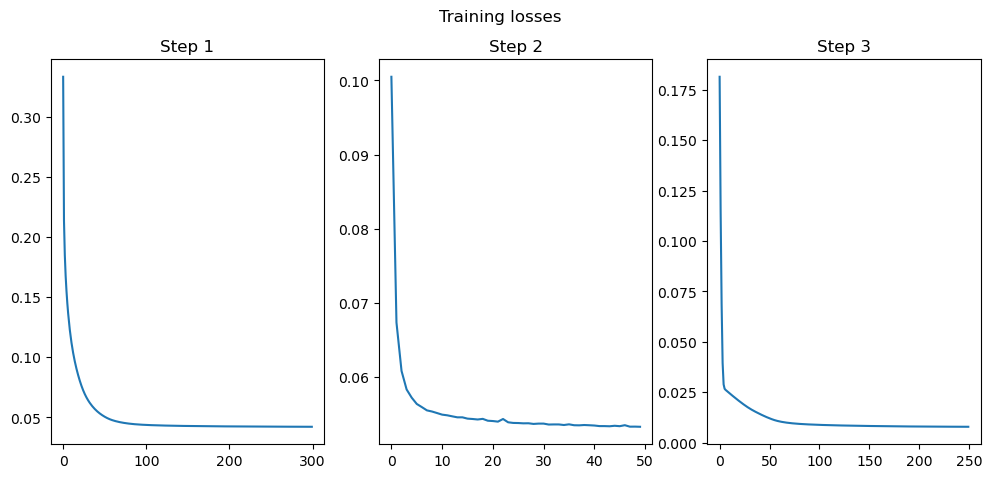

In [77]:
import matplotlib.pyplot as plt
import numpy as np

x2_mae = np.load("plot_data/train_losses_X2_mae.npy")
x4_mae = np.load("plot_data/train_losses_X4_mae.npy")
x4_mse = np.load("plot_data/train_losses_X4_mse.npy")

fig, axs = plt.subplots(1, 3, figsize=(12, 5))
fig.suptitle("Training losses")
axs[0].set_title("Step 1")
axs[1].set_title("Step 2")
axs[2].set_title("Step 3")
axs[0].plot(np.arange(len(x2_mae)), x2_mae)
axs[1].plot(np.arange(len(x4_mae)), x4_mae)
axs[2].plot(np.arange(len(x4_mse)), x4_mse)
plt.show()